## Overview

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
data = pd.read_csv('drive/MyDrive/DS_Intern_Assessment/data/starcraft_player_data.csv')
data.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [18]:
data.shape

(3395, 20)

There are 3395 rows and 20 columns

Our aim is to predict the league that the player is in (player's rank)

We set `LeagueIndex` as response variable and other 18 variables including `Age`, `HoursPerWeek`, `TotalHours`, `APM`, `SelectByHotKeys`,`AssignToHotkeys`, `UniqueHotkeys`, `MinimapAttacks`, `MinimapRightClicks`, `NumberOfPACs`, `GapBetweenPACs`, `ActionLatency`,`ActionsInPAC`, `TotalMapExplored`, `WorkersMade`, `UniqueUnitsMade`,`ComplexUnitsMade`, `ComplexAbilitiesUsed`.

`GameID` is Unique ID number for each game rather than an attribute of players, so we will not consider it in further analysis.

In [20]:
df = data.drop('GameID', axis = 1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LeagueIndex           3395 non-null   int64  
 1   Age                   3395 non-null   object 
 2   HoursPerWeek          3395 non-null   object 
 3   TotalHours            3395 non-null   object 
 4   APM                   3395 non-null   float64
 5   SelectByHotkeys       3395 non-null   float64
 6   AssignToHotkeys       3395 non-null   float64
 7   UniqueHotkeys         3395 non-null   int64  
 8   MinimapAttacks        3395 non-null   float64
 9   MinimapRightClicks    3395 non-null   float64
 10  NumberOfPACs          3395 non-null   float64
 11  GapBetweenPACs        3395 non-null   float64
 12  ActionLatency         3395 non-null   float64
 13  ActionsInPAC          3395 non-null   float64
 14  TotalMapExplored      3395 non-null   int64  
 15  WorkersMade          

In [22]:
print(sum(df['Age'] == '?'))
print(sum(df['HoursPerWeek'] == '?'))
print(sum(df['TotalHours'] == '?'))

55
56
57


In [23]:
# drop NA value

df = df[df['Age'] != '?']
df = df[df['HoursPerWeek'] != '?']
df = df[df['TotalHours'] != '?']

df.shape

(3338, 19)

In [24]:
# convert string to integer

df['Age'] = df['Age'].astype(int)
df['HoursPerWeek'] = df['HoursPerWeek'].astype(int)
df['TotalHours'] = df['TotalHours'].astype(int)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3338 entries, 0 to 3339
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LeagueIndex           3338 non-null   int64  
 1   Age                   3338 non-null   int64  
 2   HoursPerWeek          3338 non-null   int64  
 3   TotalHours            3338 non-null   int64  
 4   APM                   3338 non-null   float64
 5   SelectByHotkeys       3338 non-null   float64
 6   AssignToHotkeys       3338 non-null   float64
 7   UniqueHotkeys         3338 non-null   int64  
 8   MinimapAttacks        3338 non-null   float64
 9   MinimapRightClicks    3338 non-null   float64
 10  NumberOfPACs          3338 non-null   float64
 11  GapBetweenPACs        3338 non-null   float64
 12  ActionLatency         3338 non-null   float64
 13  ActionsInPAC          3338 non-null   float64
 14  TotalMapExplored      3338 non-null   int64  
 15  WorkersMade          

In [26]:
df.describe()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000
mean,4.120731,21.650389,15.909527,960.421809,114.575763,0.004023,0.000364,4.316357,0.000094,0.000380,0.003433,40.713819,64.209584,5.266955,22.116836,0.001031,6.541043,0.000060,0.000142
std,1.448170,4.206357,11.964495,17318.133922,48.111912,0.004726,0.000210,2.333322,0.000159,0.000359,0.000966,17.057191,19.037394,1.500605,7.440875,0.000520,1.859049,0.000112,0.000266
min,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.632600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,3.000000,19.000000,8.000000,300.000000,79.231500,0.001245,0.000202,3.000000,0.000000,0.000139,0.002743,29.326600,50.886425,4.261525,17.000000,0.000682,5.000000,0.000000,0.000000
50%,4.000000,21.000000,12.000000,500.000000,107.070300,0.002445,0.000349,4.000000,0.000039,0.000278,0.003376,37.058900,61.296100,5.087050,22.000000,0.000904,6.000000,0.000000,0.000020
75%,5.000000,24.000000,20.000000,800.000000,140.156100,0.004945,0.000493,6.000000,0.000113,0.000508,0.004003,48.510425,74.032525,6.027350,27.000000,0.001258,8.000000,0.000087,0.000182
max,7.000000,44.000000,168.000000,1000000.000000,389.831400,0.043088,0.001648,10.000000,0.003019,0.003688,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


## Exploratory Data Analysis (EDA)

As our aim is to predict player's rank, I will visualize the data and see the relationship between `LeagueIndex` and other 18 variables.

<Axes: xlabel='LeagueIndex', ylabel='Count'>

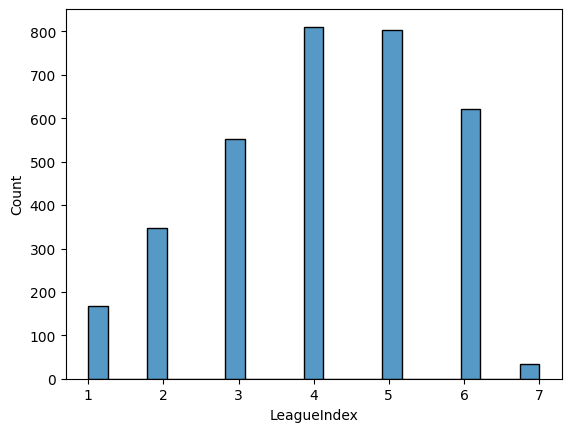

In [27]:
# Histogram of LeagueIndex
sns.histplot(df['LeagueIndex'])

Most players (approximately 800) are in 4 and 5. Less than 100 players are in 7.

 Following are several variables that are most related to the rank. Let's see how these varaibles are related to the rank.

1. Hours Per Week (Reported hours spent playing per week)

2. APM (Action per minute)

3. GapBetweenPACs (Mean duration in milliseconds between PACs)

<Axes: xlabel='LeagueIndex', ylabel='HoursPerWeek'>

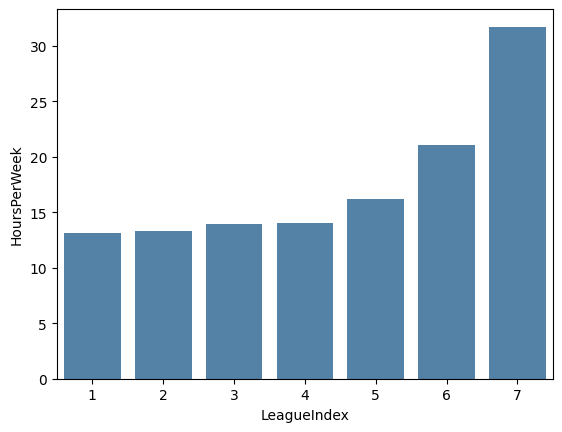

In [28]:
# HoursPerWeek vs LeagueIndex

subdf_hours = df.groupby('LeagueIndex')['HoursPerWeek'].mean().reset_index()
sns.barplot(data=subdf_hours, x="LeagueIndex", y="HoursPerWeek", color='steelblue')

On average, players who are in rank 7 (high rank) spend approximately 30 hours per week. Players in other rank spend less than 20 hours per week. We can conclude that if a player spend more than 20 hours per week can get a high rank.

<Axes: xlabel='LeagueIndex', ylabel='APM'>

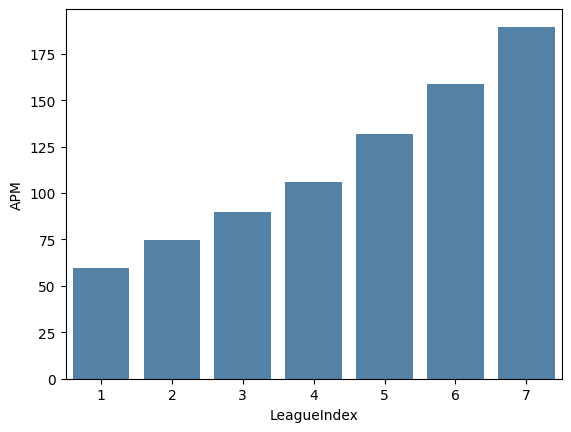

In [29]:
# APM vs LeagueIndex

subdf_apm = df.groupby('LeagueIndex')['APM'].mean().reset_index()
sns.barplot(data=subdf_apm, x="LeagueIndex", y="APM", color='steelblue')

As the APM increases, rank is increasing. If a player made more APM, he/she can get a higher rank.

<Axes: xlabel='LeagueIndex', ylabel='GapBetweenPACs'>

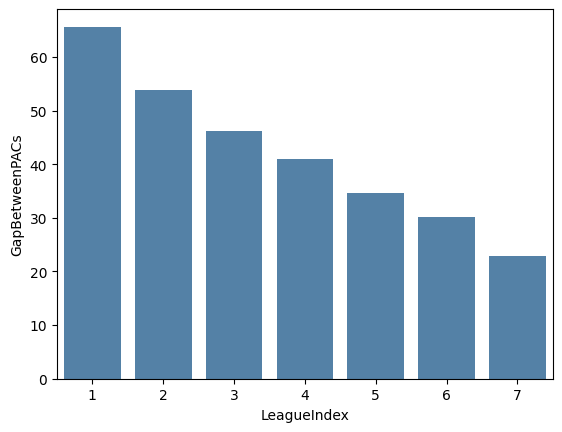

In [30]:
# GapBetweenPACs vs LeagueIndex

subdf_pac = df.groupby('LeagueIndex')['GapBetweenPACs'].mean().reset_index()
sns.barplot(data=subdf_pac, x="LeagueIndex", y="GapBetweenPACs", color='steelblue')

PAC is a perception action cycle which means how fast the player shifts to the next part of the map/actions. GapBetweenPACs means mean duration in milliseconds between PACs. 

We can conclude that if mean duration between PACs is less, players can get higher ranks. That makes sense because players shifts fast to the next part of the map/actions, they can make more actions and explore more on the map and get better ranks.

<Axes: >

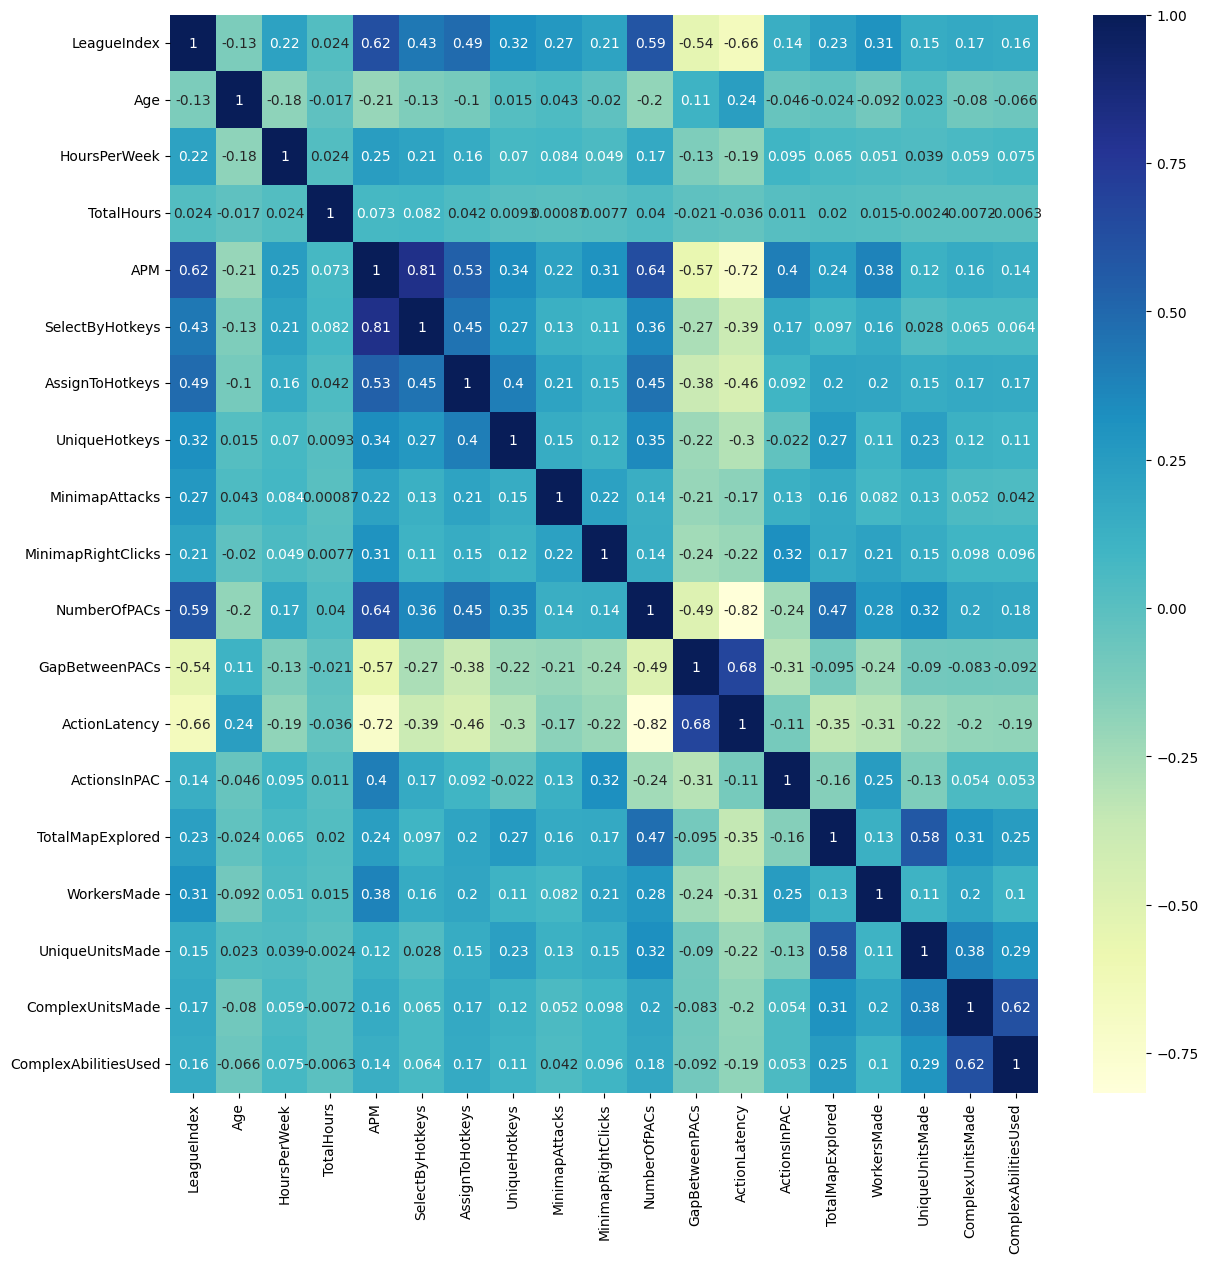

In [31]:
corr = df.corr()
plt.subplots(figsize=(14,14))
sns.heatmap(corr,annot=True,vmax=1,cmap='YlGnBu')

The graph shows the correlation matrix between 19 variables. It shows the correlation between LeagueIndex and other 18 variables and also the correlation of 18 independent variables so we can see if there is Multicollinearity.

## Model

### Ordinal Logistic Regression

As our aim is to predict player's rank, we consider it as a classification problem and rank is an ordinal variable. Therefore, I'll construct  Ordinal Logistic Regression model to solve this problem.

In [38]:
from sklearn.model_selection import train_test_split
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [88]:
# split train and test set

X = df.drop('LeagueIndex', axis = 1)
y = df['LeagueIndex']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=12345)

In [89]:
mod_log = OrderedModel(train_y, train_X, distr='logit')
res_log = mod_log.fit(method='bfgs')
res_log.summary()

Optimization terminated successfully.
         Current function value: 1.344783
         Iterations: 205
         Function evaluations: 214
         Gradient evaluations: 214


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:            LeagueIndex   Log-Likelihood:                -3141.4
Model:                   OrderedModel   AIC:                             6331.
Method:            Maximum Likelihood   BIC:                             6469.
Date:                Sun, 28 May 2023                                         
Time:                        20:08:29                                         
No. Observations:                2336                                         
Df Residuals:                    2312                                         
Df Model:                          24                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Age                      0.0123      0.010      1.268      0.205      -0.007       0.031
HoursPerWeek             0.0097      0.004      2.559      0.011       0.002       0.017
TotalHours               0.0004   8.71e-05      4.189      0.000       0.000       0.001
APM                     -0.0050      0.005     -1.035      0.301      -0.015       0.005
SelectByHotkeys        100.9454     28.791      3.506      0.000      44.516     157.375
AssignToHotkeys       1474.0168    242.258      6.084      0.000     999.200    1948.834
UniqueHotkeys            0.0851      0.019      4.503      0.000       0.048       0.122
MinimapAttacks        2061.2883    295.841      6.968      0.000    1481.450    2641.127
MinimapRightClicks      45.1679    121.339      0.372      0.710    -192.651     282.987
NumberOfPACs           595.3058    151.439      3.931      0.000     298.492     892.120
GapBetweenPACs          -0.0230      0.004     -6.334      0.000      -0.030      -0.016
ActionLatency           -0.0390      0.005     -7.611      0.000      -0.049      -0.029
ActionsInPAC             0.0858      0.070      1.228      0.220      -0.051       0.223
TotalMapExplored        -0.0073      0.007     -1.026      0.305      -0.021       0.007
WorkersMade            411.9666     85.402      4.824      0.000     244.582     579.351
UniqueUnitsMade         -0.0679      0.027     -2.518      0.012      -0.121      -0.015
ComplexUnitsMade       -59.0266    461.406     -0.128      0.898    -963.366     845.313
ComplexAbilitiesUsed   213.2014    192.749      1.106      0.269    -164.580     590.982
1/2                     -4.1206      0.796     -5.177      0.000      -5.681      -2.560
2/3                      0.6048      0.062      9.825      0.000       0.484       0.725
3/4                      0.4150      0.047      8.810      0.000       0.323       0.507
4/5                      0.5221      0.038     13.696      0.000       0.447       0.597
5/6                      0.6077      0.038     15.852      0.000       0.533       0.683
6/7                      1.4464      0.055     26.262      0.000       1.338       1.554
========================================================================================
"""

In [90]:
predicted = res_log.model.predict(res_log.params, exog=test_X)
predicted[0:5]

/usr/local/lib/python3.10/dist-packages/statsmodels/miscmodels/ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]


array([[6.49925286e-01, 2.70606169e-01, 6.08341736e-02, 1.51275857e-02,
        2.94610115e-03, 5.52666313e-04, 8.01832026e-06],
       [1.32438105e-03, 6.88197791e-03, 2.80483306e-02, 1.32475545e-01,
        3.91376564e-01, 4.28792431e-01, 1.11007699e-02],
       [8.90151512e-04, 4.63804976e-03, 1.91222229e-02, 9.53531106e-02,
        3.41038586e-01, 5.22523913e-01, 1.64339666e-02],
       [6.86089873e-03, 3.44613782e-02, 1.22534689e-01, 3.50089251e-01,
        3.55042651e-01, 1.28860908e-01, 2.15022451e-03],
       [2.78938212e-03, 1.43639140e-02, 5.63612262e-02, 2.26272917e-01,
        4.28893090e-01, 2.66025722e-01, 5.29374844e-03]])

In [91]:
pred_choice = predicted.argmax(1) + 1
pred_choice[0:5]

array([1, 6, 6, 5, 5])

In [97]:
print('Accuracy:', (np.asarray(test_y) == pred_choice).mean())

Accuracy: 0.4281437125748503


Precision of the model is only 42.8% which is not good. I considered if there is Multicollinearity so I used PCA for dimension reduction. However, the result is worse. So other powerful models should be considered such as random forest. 

## Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [108]:
rf = RandomForestClassifier(max_depth=10, random_state=12345)
rf.fit(train_X, train_y)

RandomForestClassifier(max_depth=10, random_state=12345)

In [109]:
pred = rf.predict(test_X)

In [110]:
accuracy = accuracy_score(test_y, pred)
print("Accuracy:", accuracy)

Accuracy: 0.4111776447105788


The accuracy of random forest is not as good as Ordinal Logistic Regression. Therefore, we will then go back to Ordinal Logistic Regression model.

## Result

In [111]:
res_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:            LeagueIndex   Log-Likelihood:                -3141.4
Model:                   OrderedModel   AIC:                             6331.
Method:            Maximum Likelihood   BIC:                             6469.
Date:                Sun, 28 May 2023                                         
Time:                        20:22:28                                         
No. Observations:                2336                                         
Df Residuals:                    2312                                         
Df Model:                          24                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Age                      0.0123      0.010      1.268      0.205      -0.007       0.031
HoursPerWeek             0.0097      0.004      2.559      0.011       0.002       0.017
TotalHours               0.0004   8.71e-05      4.189      0.000       0.000       0.001
APM                     -0.0050      0.005     -1.035      0.301      -0.015       0.005
SelectByHotkeys        100.9454     28.791      3.506      0.000      44.516     157.375
AssignToHotkeys       1474.0168    242.258      6.084      0.000     999.200    1948.834
UniqueHotkeys            0.0851      0.019      4.503      0.000       0.048       0.122
MinimapAttacks        2061.2883    295.841      6.968      0.000    1481.450    2641.127
MinimapRightClicks      45.1679    121.339      0.372      0.710    -192.651     282.987
NumberOfPACs           595.3058    151.439      3.931      0.000     298.492     892.120
GapBetweenPACs          -0.0230      0.004     -6.334      0.000      -0.030      -0.016
ActionLatency           -0.0390      0.005     -7.611      0.000      -0.049      -0.029
ActionsInPAC             0.0858      0.070      1.228      0.220      -0.051       0.223
TotalMapExplored        -0.0073      0.007     -1.026      0.305      -0.021       0.007
WorkersMade            411.9666     85.402      4.824      0.000     244.582     579.351
UniqueUnitsMade         -0.0679      0.027     -2.518      0.012      -0.121      -0.015
ComplexUnitsMade       -59.0266    461.406     -0.128      0.898    -963.366     845.313
ComplexAbilitiesUsed   213.2014    192.749      1.106      0.269    -164.580     590.982
1/2                     -4.1206      0.796     -5.177      0.000      -5.681      -2.560
2/3                      0.6048      0.062      9.825      0.000       0.484       0.725
3/4                      0.4150      0.047      8.810      0.000       0.323       0.507
4/5                      0.5221      0.038     13.696      0.000       0.447       0.597
5/6                      0.6077      0.038     15.852      0.000       0.533       0.683
6/7                      1.4464      0.055     26.262      0.000       1.338       1.554
========================================================================================
"""

As the result shown above, player's rank is affected by `HoursPerWeek`, `TotalHours`, `SelectByHotKeys`,`AssignToHotkeys`, `UniqueHotkeys`, `MinimapAttacks`, `NumberOfPACs`, `GapBetweenPACs`, `ActionLatency`, `WorkersMade`, `UniqueUnitsMade` with significance level $\alpha = 0.05$.

Suggestions about collecting data: collect data with more information about Hotkeys and PACs and actions.